In [10]:
import sys
sys.path.append("../src/")
from auv_gym_env import Environment
import matplotlib.pyplot as plt
import numpy as np
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
# instantiate environment
world_size = 50
gravity = -1
xinit, yinit = 10, 10
targetx, targety = 0, 0
env = Environment(world_size, gravity, xinit, yinit, targetx, targety)
env.render()
rewards = list()

In [3]:
# control AUV with constant thrust angle and power
nframes = 10000
for frame in range(nframes):
    obs, reward, done, info = env.step((
        np.random.uniform(*env.auv._thruster_angle_limits), 
        np.random.uniform(0, 50)
    ))
    env.render()
    #print(reward)
    rewards.append(reward)

In [12]:
# plot instantaneous reward sequence
plt.figure()
plt.plot(rewards, "kx")
plt.plot(np.cumsum(rewards), "k--")
plt.plot(np.divide(np.cumsum(rewards), np.linspace(1, len(rewards), len(rewards))), "k-")
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Reward $r$')
plt.xlabel('Time Index')
plt.legend(['Instantaneous', 'Cummulative', "Running Average"])
plt.show()

In [5]:
# reward characterisation
r_target = lambda d: 1 / np.exp(d)
r_obstacle = lambda d: -1 / np.exp(d)
r_thruster = lambda T: -T**2

# normalised metrics
pts = np.linspace(0, 1, 1000)

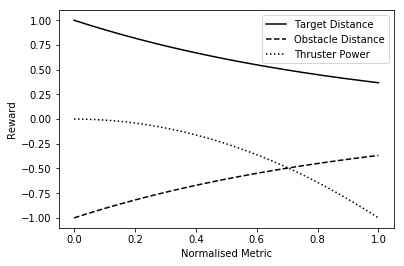

In [6]:
# plotting
plt.figure()
for F, mark in zip([r_target, r_obstacle, r_thruster], ["k-", "k--", "k:"]):
    plt.plot(pts, F(pts), mark)
plt.legend(["Target Distance", "Obstacle Distance", "Thruster Power"])
plt.ylabel("Reward")
plt.xlabel("Normalised Metric")
plt.show()